In [50]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
from wrf import getvar, interplevel, to_np, get_basemap, ll_to_xy,latlon_coords,latlon_coords, smooth2d,get_cartopy, cartopy_xlim, cartopy_ylim
import pandas as pd
from netCDF4 import Dataset
import netCDF4
import h5py as h5
import csv
from scipy import stats
import seaborn as sns
from metpy.plots import SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units

In [51]:
def wrf_pres(P,PB):
    return (P+PB) #in Pa

def wrf_height(PH,PHB):
    return (PH+PHB)/9.81

def wrf_theta(PTEMP):
    return (PTEMP+300.)

def wrf_temp(THETA,PRES):
    return (THETA)*(PRES/1000.)**(.2854) # in hPa
def es(T):
    return (610.7*np.exp(((2500800+(4218-1870.4)*273.16)*(1/273.16-1/T)-(4218-1870.4)*np.log(T/273.16))/461.51))
def mean(data):
    mean = sum(data)/len(data)
    return(mean)

In [52]:
filename = "330ERA5SEEDED"
ncfile2 = Dataset(filename)

In [53]:
lat = ncfile2['XLAT'][:].squeeze()
lon = ncfile2['XLONG'][:].squeeze()

In [54]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt
request = cimgt.StamenTerrain()   # very responsive
crg = request.crs
z = 0
u = 0
while z< 600:
    while u < 900:
        new = crg.transform_point(lon[z,u], lat[z,u], crs.Geodetic())
        lon[z,u] = new[0]
        lat[z,u] = new[1]
        u = u + 1
    z = z + 1
    u = 0

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/cheyenne/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The StamenTerrain class was deprecated in v0.17. Please use Stamen('terrain-background') instead.
  """


In [36]:
seed_material = ncfile2['QNA1'][:].squeeze()
P = ncfile2['P'][:].squeeze()
PB = ncfile2['PB'][:].squeeze()
Tv = getvar(ncfile2, 'tv', units = 'K', meta = False)
PRES = wrf_pres(P,PB)/100
PRES = PRES*100
Density = PRES/(287.16*Tv)
seed_material = seed_material * Density

In [37]:
seed = np.max(seed_material, axis = 0)

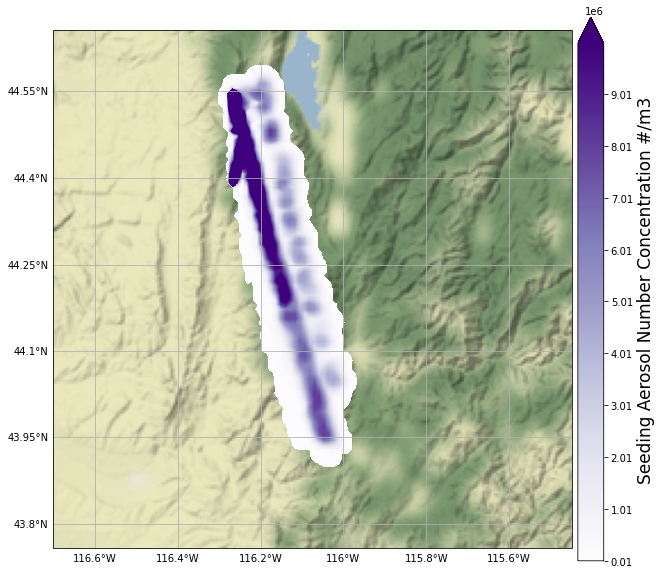

In [39]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(10, 10),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

fig, ax = make_map(projection = crg)

# specify map extent here
lonmin, lonmax = -116.70062, -115.44735
latmin, latmax = 43.756786, 44.655064

LL = crg.transform_point(lonmin, latmin, ccrs.Geodetic())
UR = crg.transform_point(lonmax, latmax, ccrs.Geodetic())
EW = UR[0] - LL[0]
SN = UR[1] - LL[1]
side = max(EW,SN)
mid_x, mid_y = LL[0]+EW/2.0, LL[1]+SN/2.0  #center location

extent = [mid_x-side/2.0, mid_x+side/2.0, mid_y-side/2.0, mid_y+side/2.0]   # map coordinates, meters
ax.set_extent(extent, crs=crg)
ax.add_image(request, 8)

rlevs = np.arange(10000,10000000,10000)

cont = ax.contourf(lon[269:385,343:456], lat[269:385,343:456], seed[269:385,343:456],rlevs,cmap=get_cmap("Purples"), extend = "max")
cbr = plt.colorbar(cont,fraction=0.06, pad=0.01)
cbr.set_label('Seeding Aerosol Number Concentration #/m3', fontsize = 17)

In [ ]:
#LOOPABLE

In [55]:
hour_list = ['300','310','320','330','340','350','400','410','420','430','440','450','500','510','520','530','540','550','600']

300
310
320
330
340
350
400
410
420
430
440
450
500
510
520
530
540
550
600


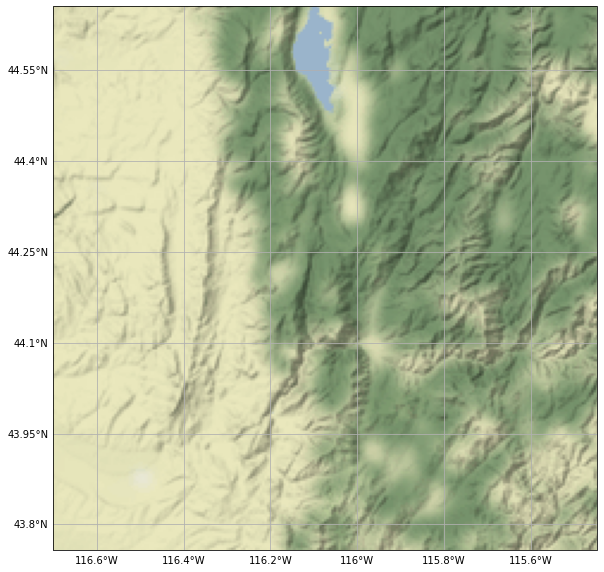

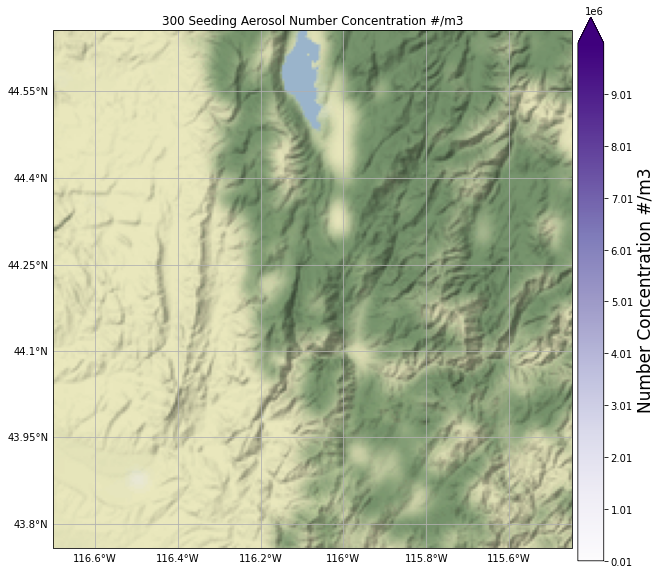

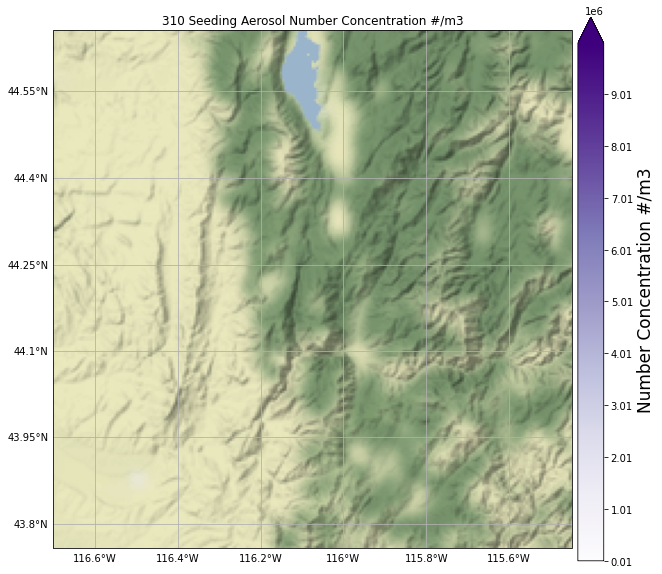

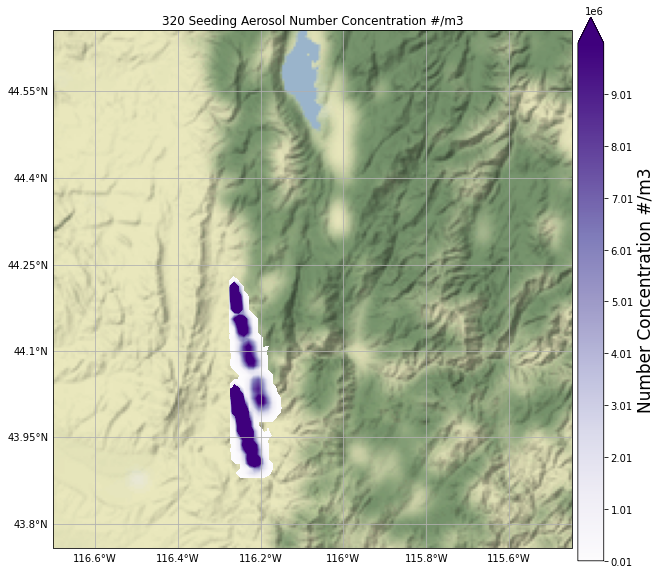

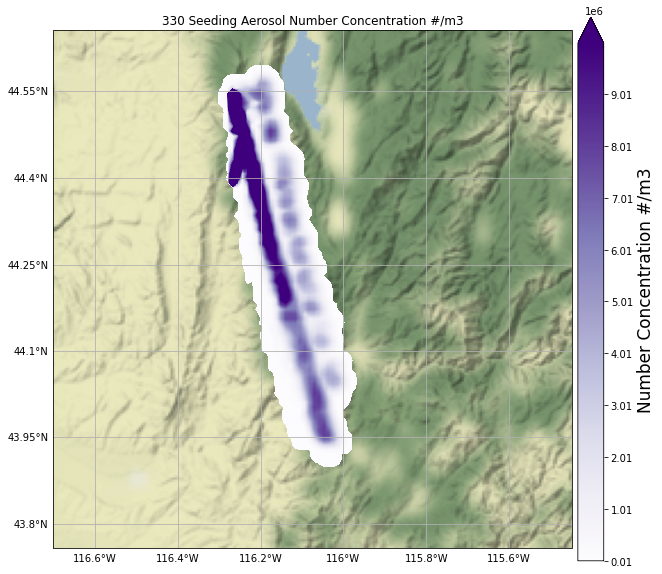

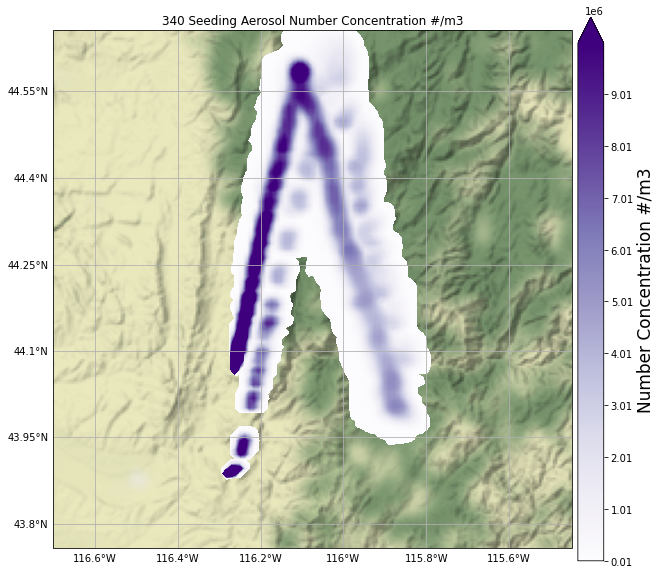

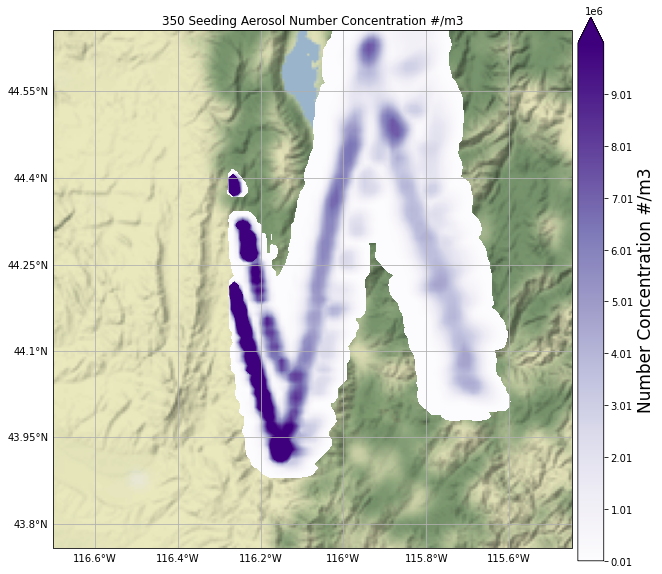

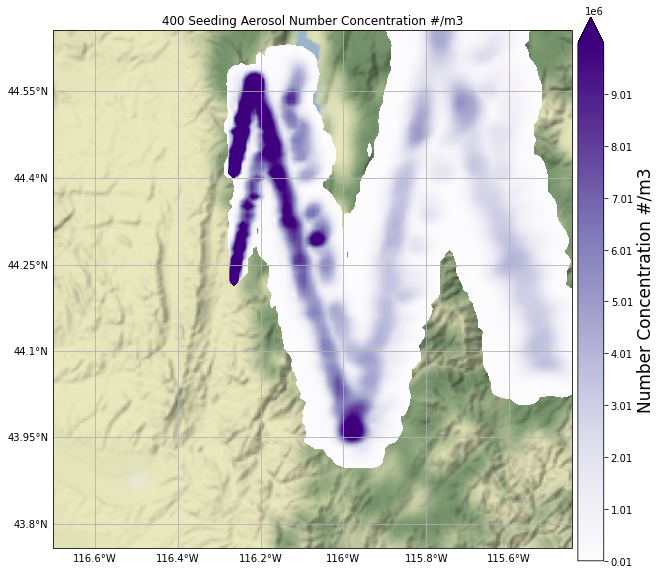

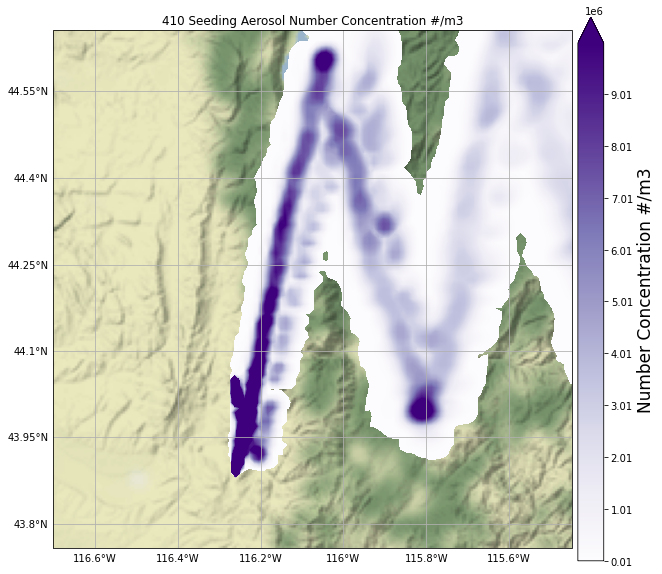

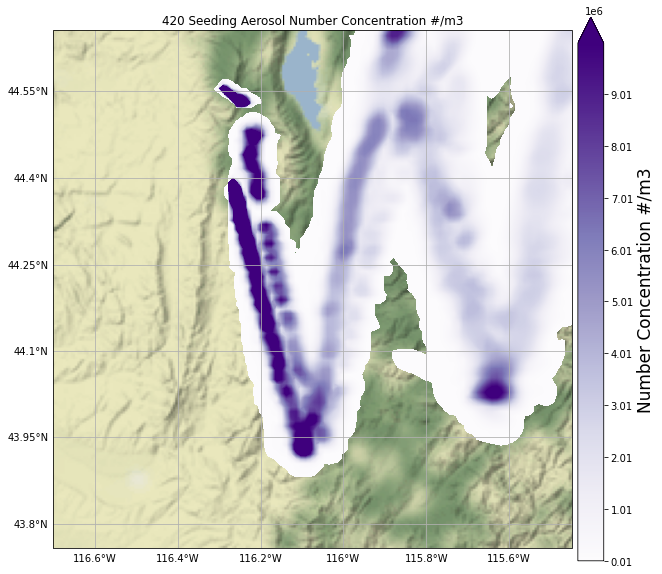

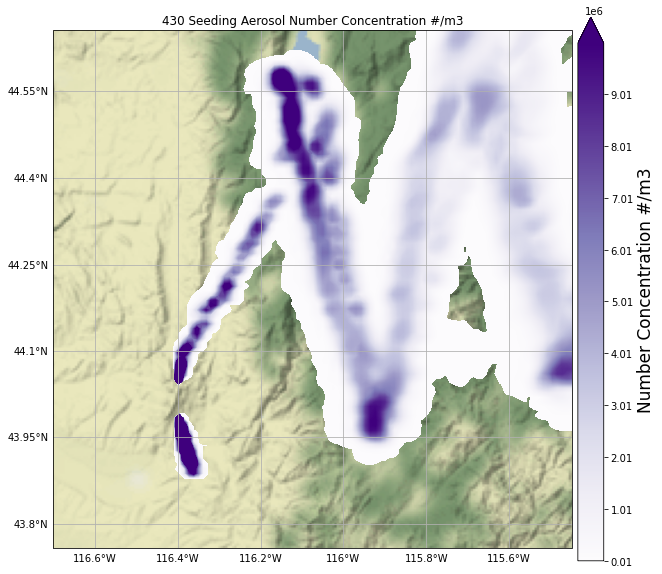

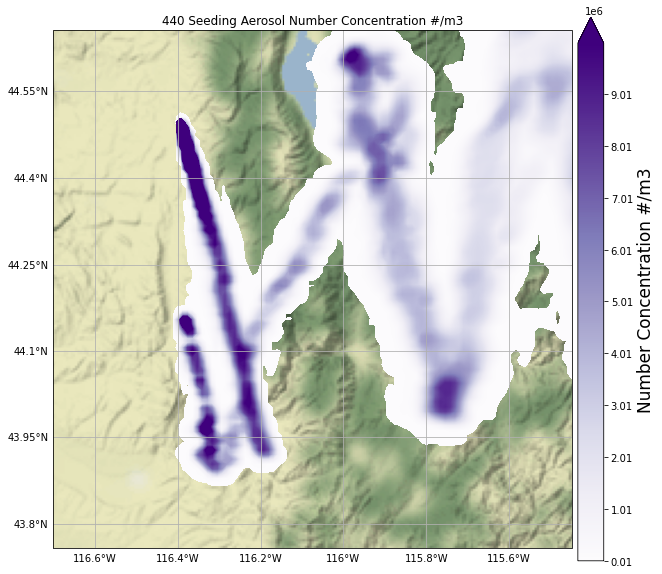

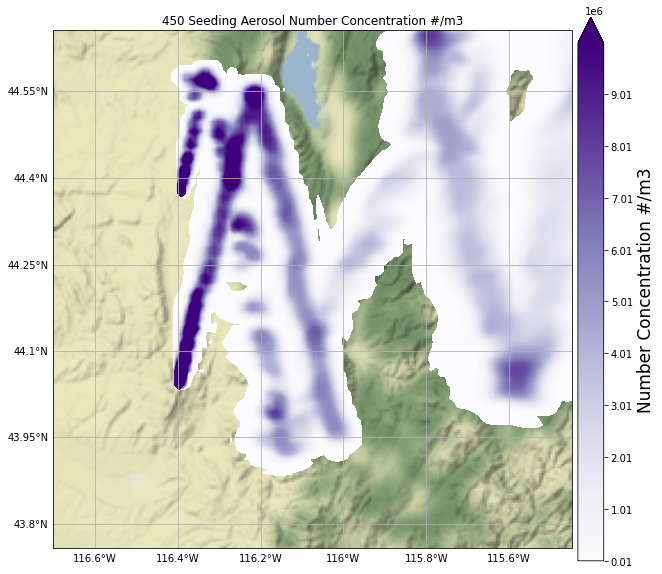

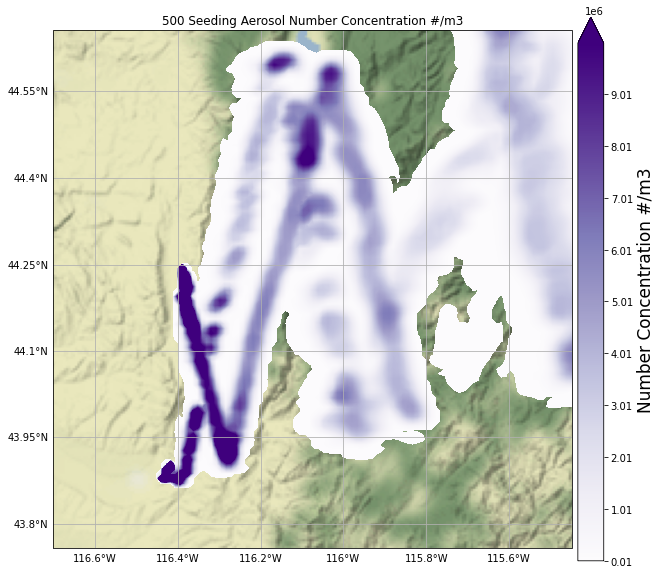

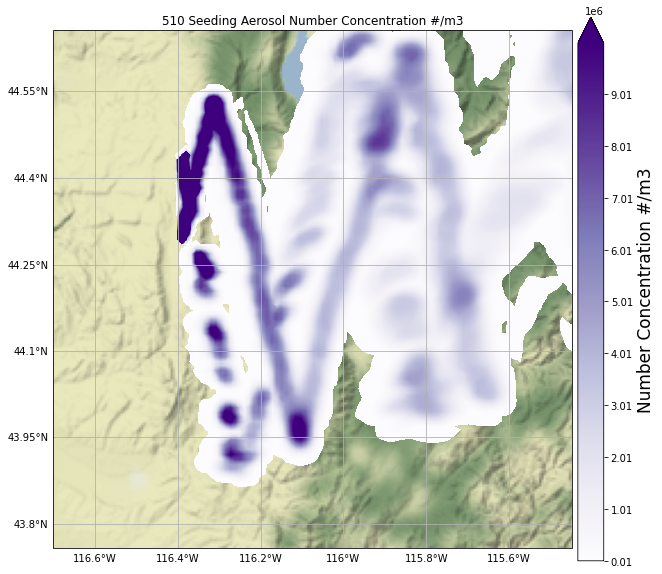

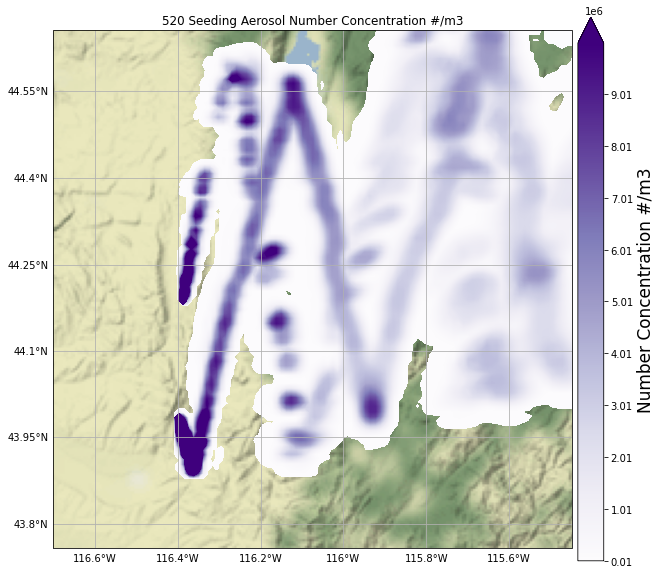

In [ ]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(10, 10),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

fig, ax = make_map(projection = crg)

# specify map extent here
lonmin, lonmax = -116.70062, -115.44735
latmin, latmax = 43.756786, 44.655064

LL = crg.transform_point(lonmin, latmin, ccrs.Geodetic())
UR = crg.transform_point(lonmax, latmax, ccrs.Geodetic())
EW = UR[0] - LL[0]
SN = UR[1] - LL[1]
side = max(EW,SN)
mid_x, mid_y = LL[0]+EW/2.0, LL[1]+SN/2.0  #center location

extent = [mid_x-side/2.0, mid_x+side/2.0, mid_y-side/2.0, mid_y+side/2.0]   # map coordinates, meters
ax.set_extent(extent, crs=crg)
ax.add_image(request, 8)
for hour in hour_list:
    print(hour)
    title = hour + " Seeding Aerosol Number Concentration #/m3"
    picname = hour+"SeedNCON.png"
    seed_file = hour+"ERA5SEEDED"
    filename = seed_file
    ncfile2 = Dataset(filename)
    
    P = ncfile2['P'][:].squeeze()
    PB = ncfile2['PB'][:].squeeze()
    Tv = getvar(ncfile2, 'tv', units = 'K', meta = False)
    PRES = wrf_pres(P,PB)/100
    PRES = PRES*100
    Density = PRES/(287.16*Tv)
    
    seed_material = ncfile2['QNA1'][:].squeeze()
    seed_material = seed_material * Density
    seed = np.max(seed_material, axis = 0)
    rlevs = np.arange(10000,10000000,10000)
    fig, ax = make_map(projection = crg)

    # specify map extent here
    lonmin, lonmax = -116.70062, -115.44735
    latmin, latmax = 43.756786, 44.655064

    LL = crg.transform_point(lonmin, latmin, ccrs.Geodetic())
    UR = crg.transform_point(lonmax, latmax, ccrs.Geodetic())
    EW = UR[0] - LL[0]
    SN = UR[1] - LL[1]
    side = max(EW,SN)
    mid_x, mid_y = LL[0]+EW/2.0, LL[1]+SN/2.0  #center location

    extent = [mid_x-side/2.0, mid_x+side/2.0, mid_y-side/2.0, mid_y+side/2.0]   # map coordinates, meters
    ax.set_extent(extent, crs=crg)
    ax.add_image(request, 8)

    cont = ax.contourf(lon[269:385,343:456], lat[269:385,343:456], seed[269:385,343:456],rlevs,cmap=get_cmap("Purples"), extend = "max")
    cbr = plt.colorbar(cont,fraction=0.06, pad=0.01)
    plt.title(title)
    cbr.set_label('Number Concentration #/m3', fontsize = 17)
    plt.savefig(picname,dpi = 400)
    